In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Path to dataset files: /Users/abhaypratapsingh/.cache/kagglehub/datasets/patrickb1912/ipl-complete-dataset-20082020/versions/3


In [9]:
#!pip install seaborn

In [10]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


In [136]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [12]:
import pandas as pd
import numpy as np
import os
import sys

In [13]:
#df=pd.read_csv(/Users/abhaypratapsingh/.cache/kagglehub/datasets/patrickb1912/ipl-complete-dataset-20082020/versions/3/)

In [14]:
!pwd

/Users/abhaypratapsingh/Documents/tensorflow-metal/bin/ML_Notebooks


In [15]:
for file in os.listdir(path):
    print(file)
    df=pd.read_csv(path+'/'+file)

matches.csv
deliveries.csv


In [16]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [17]:
df.count()

match_id            260920
inning              260920
batting_team        260920
bowling_team        260920
over                260920
ball                260920
batter              260920
bowler              260920
non_striker         260920
batsman_runs        260920
extra_runs          260920
total_runs          260920
extras_type          14125
is_wicket           260920
player_dismissed     12950
dismissal_kind       12950
fielder               9354
dtype: int64

In [18]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [19]:

for file in os.listdir(path):
    print(file)
    df=pd.read_csv(path+'/'+'matches.csv')
    df_matches=pd.read_csv(path+'/'+'matches.csv')

matches.csv
deliveries.csv


In [20]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [21]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [83]:
mom_count=df_matches['player_of_match'].value_counts()

In [84]:
#Most man of the matches in IPL
mom_count.head(30)

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
SP Narine         15
SK Raina          14
KA Pollard        14
JC Buttler        13
G Gambhir         13
KL Rahul          13
AM Rahane         13
MEK Hussey        12
A Mishra          12
Rashid Khan       12
S Dhawan          12
V Sehwag          11
SV Samson         11
DR Smith          11
RD Gaikwad        11
AT Rayudu         10
UT Yadav          10
F du Plessis      10
JH Kallis         10
Shubman Gill      10
Name: count, dtype: int64

# EDA

In [24]:
df.shape

(1095, 20)

In [25]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [26]:
df.isnull()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1093,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [27]:
def Classify_features(df):
    categorical_features=[]
    non_categorical_featires=[]
    continuous_features=[]
    Discrete_features=[]


    for column in df.columns:
        if df[column].dtype=='object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_featires.append(column)

        elif df[column].dtype in ['int64','float64','float32','int32']:
            if df[column].nunique() < 30:
                Discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features,non_categorical_featires,continuous_features, Discrete_features
                

In [28]:
categorical,noncategorical,discrete,continuous=Classify_features(df)

In [29]:
print("Categorical Features are :", categorical)

print("Non Categorical Features are :", noncategorical)

print("Continuous Features are :", discrete)

print("Discrete Features are :", continuous)


Categorical Features are : ['match_type', 'toss_decision', 'result', 'super_over', 'method']
Non Categorical Features are : ['season', 'city', 'date', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'winner', 'umpire1', 'umpire2']
Continuous Features are : ['id', 'result_margin', 'target_runs']
Discrete Features are : ['target_overs']


In [41]:
!pwd

/Users/abhaypratapsingh/Documents/tensorflow-metal/bin/ML_Notebooks


In [30]:
for i in categorical:
    print(i)

match_type
toss_decision
result
super_over
method


In [44]:
corr_matrix=df[continuous].corr

In [45]:
type(corr_matrix)

method

In [47]:
continuous

['target_overs']

/var/folders/8y/pr6d07_x5rdgsfmfspvr1d300000gn/T/ipykernel_60723/3761876843.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['match_type'],bins=1000,kde=True,palette='hls')


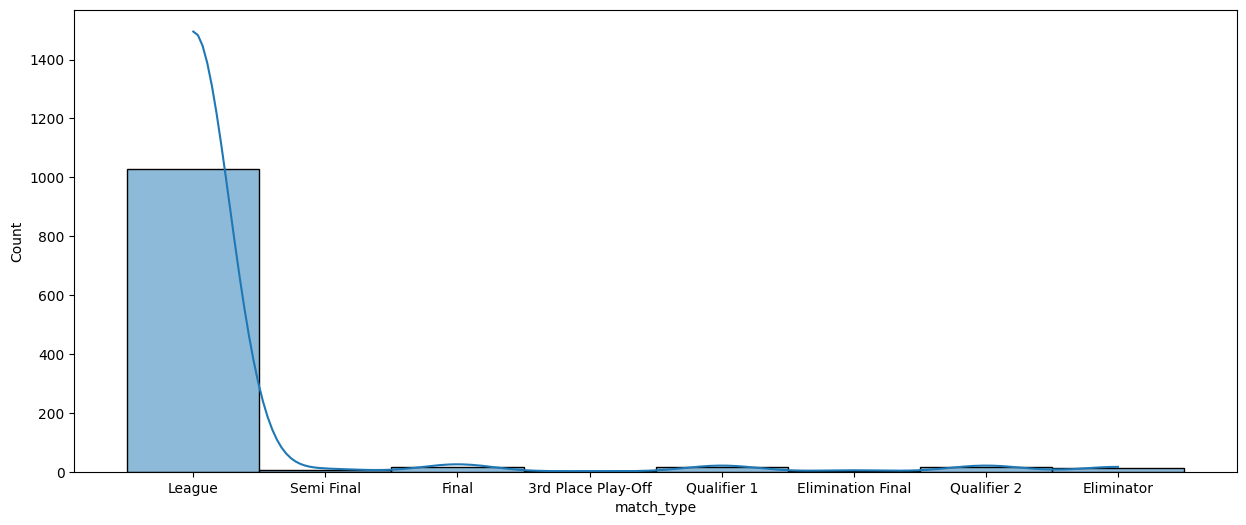

In [40]:
plt.figure(figsize=(15,6))
sns.histplot(df['match_type'],bins=1000,kde=True,palette='hls')
plt.show()

In [53]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [63]:
df['city'].describe

<bound method NDFrame.describe of 0        Bangalore
1       Chandigarh
2            Delhi
3           Mumbai
4          Kolkata
           ...    
1090     Hyderabad
1091     Ahmedabad
1092     Ahmedabad
1093       Chennai
1094       Chennai
Name: city, Length: 1095, dtype: object>

In [71]:
df.groupby(['player_of_match', 'city']).size().reset_index(name='count')\
  .sort_values(['player_of_match', 'count'], ascending=False)\
  .groupby('player_of_match').first().reset_index()


,player_of_match,city,count
0,A Chandila,Jaipur,1
1,A Kumble,Chennai,1
2,A Manohar,Ahmedabad,1
3,A Mishra,Delhi,5
4,A Nehra,Mumbai,2
...,...,...,...
284,YK Pathan,Kolkata,5
285,YS Chahal,Mumbai,2
286,Yash Thakur,Lucknow,1
287,Yuvraj Singh,Bangalore,1


In [70]:
df.pivot_table(index='player_of_match', columns='city', aggfunc='size', fill_value=0)

city,Abu Dhabi,Ahmedabad,Bangalore,Bengaluru,Bloemfontein,Cape Town,Centurion,Chandigarh,Chennai,Cuttack,...,Mumbai,Nagpur,Navi Mumbai,Port Elizabeth,Pune,Raipur,Rajkot,Ranchi,Sharjah,Visakhapatnam
player_of_match,,,,,,,,,,,,,,,,,,,,,
A Chandila,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Kumble,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
A Manohar,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Mishra,0,0,0,0,0,0,0,0,1,0,...,2,0,0,0,1,0,0,0,0,0
A Nehra,0,0,0,0,0,0,0,0,1,0,...,2,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,0,1,0,0,0,1,1,0,0,0,...,3,0,0,1,1,0,0,0,0,0
YS Chahal,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
Yash Thakur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_t.head(50)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,MS DHONI,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MS DHONI,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MS DHONI,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MS DHONI,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,MS DHONI,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,MS DHONI,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,MS DHONI,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,MS DHONI,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,MS DHONI,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,MS DHONI,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


## Implementation of Algorithms

In [87]:
categorical

['match_type', 'toss_decision', 'result', 'super_over', 'method']

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [88]:
drop_cols = ['id', 'date', 'umpire1', 'umpire2', 'method']

In [89]:
df = df.drop(columns=drop_cols, errors='ignore')

In [90]:
# Handle missing values
df = df.fillna(df.mode().iloc[0])  

In [92]:
feature_cols = ['city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']


In [121]:
df=df[['city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

In [122]:
labelencod = LabelEncoder()
for col in feature_cols:
    df[col] = labelencod.fit_transform(df[col])

/var/folders/8y/pr6d07_x5rdgsfmfspvr1d300000gn/T/ipykernel_60723/1916228105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = labelencod.fit_transform(df[col])
/var/folders/8y/pr6d07_x5rdgsfmfspvr1d300000gn/T/ipykernel_60723/1916228105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = labelencod.fit_transform(df[col])
/var/folders/8y/pr6d07_x5rdgsfmfspvr1d300000gn/T/ipykernel_60723/1916228105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [123]:
df[col]

0        8
1        0
2        3
3       16
4        8
        ..
1090    18
1091     8
1092    13
1093    18
1094     8
Name: winner, Length: 1095, dtype: int64

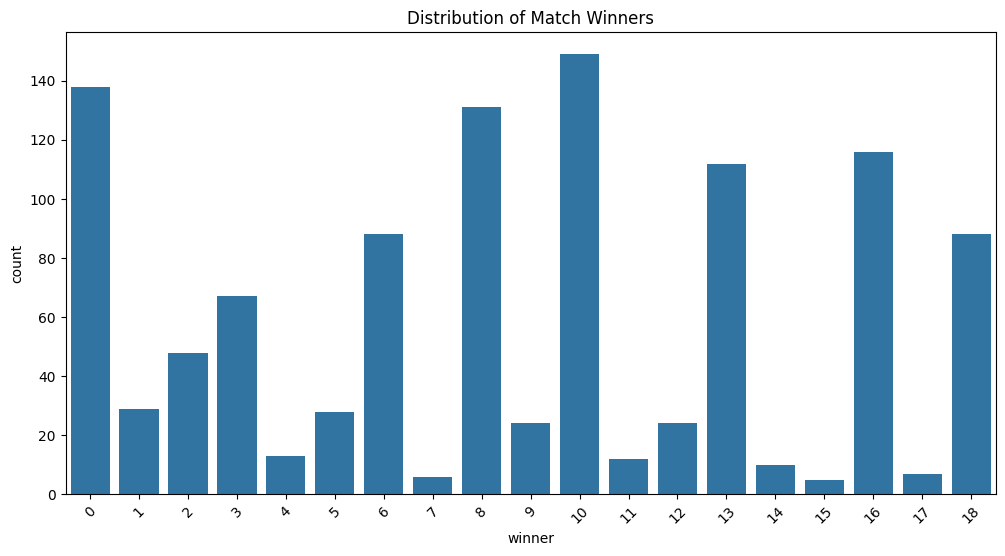

In [124]:
# EDA: Visualization of column distributions
plt.figure(figsize=(12, 6))
sns.countplot(x='winner', data=df)
plt.title("Distribution of Match Winners")
plt.xticks(rotation=45)
plt.show()


In [112]:
#df['season'] = df['season'].apply(lambda x: int(x.split('/')[0]))

In [126]:
X = df.drop(columns=['winner'])
y = df['winner']


In [114]:
#df['season'] = df['season'].apply(lambda x: int(x.split('/')[0]))

In [127]:
df

,city,venue,team1,team2,toss_winner,toss_decision,winner
0,2,23,16,8,16,1,8
1,7,40,6,0,0,0,0
2,10,16,3,13,13,0,3
3,26,55,10,16,10,0,16
4,23,14,8,1,1,0,8
...,...,...,...,...,...,...,...
1090,16,43,12,18,12,0,18
1091,1,32,18,8,18,0,8
1092,1,32,17,13,13,1,13
1093,8,28,18,13,13,1,18


In [128]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [133]:
y_pred = svm_model.predict(X_test)


In [134]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3242009132420091
              precision    recall  f1-score   support

           0       0.43      0.81      0.56        27
           1       0.00      0.00      0.00         3
           2       0.33      0.14      0.20         7
           3       0.60      0.46      0.52        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.22      0.10      0.13        21
           7       0.00      0.00      0.00         2
           8       0.30      0.39      0.34        28
           9       0.00      0.00      0.00         6
          10       0.14      0.19      0.16        21
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.50      0.28      0.36        25
          14       0.00      0.00      0.00         3
          16       0.29      0.40      0.34        30
          17       0.00      0.00      0.00         

/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [138]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)


/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 0.2054794520547945

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.56      0.35        27
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00         2
           8       0.24      0.29      0.26        28
           9       0.00      0.00      0.00         6
          10       0.07      0.19      0.11        21
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00         3
          16       0.33      0.43      0.38        30
          17       0.00    

/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

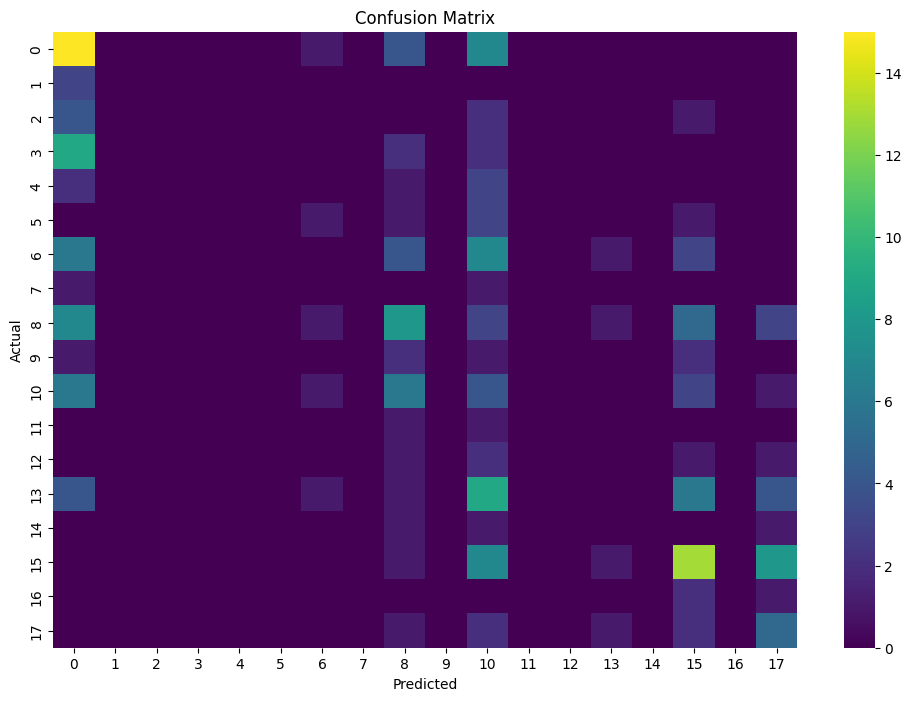

In [140]:
y_pred = logreg.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<Axes: title={'center': 'Feature Weights per Team Class'}>

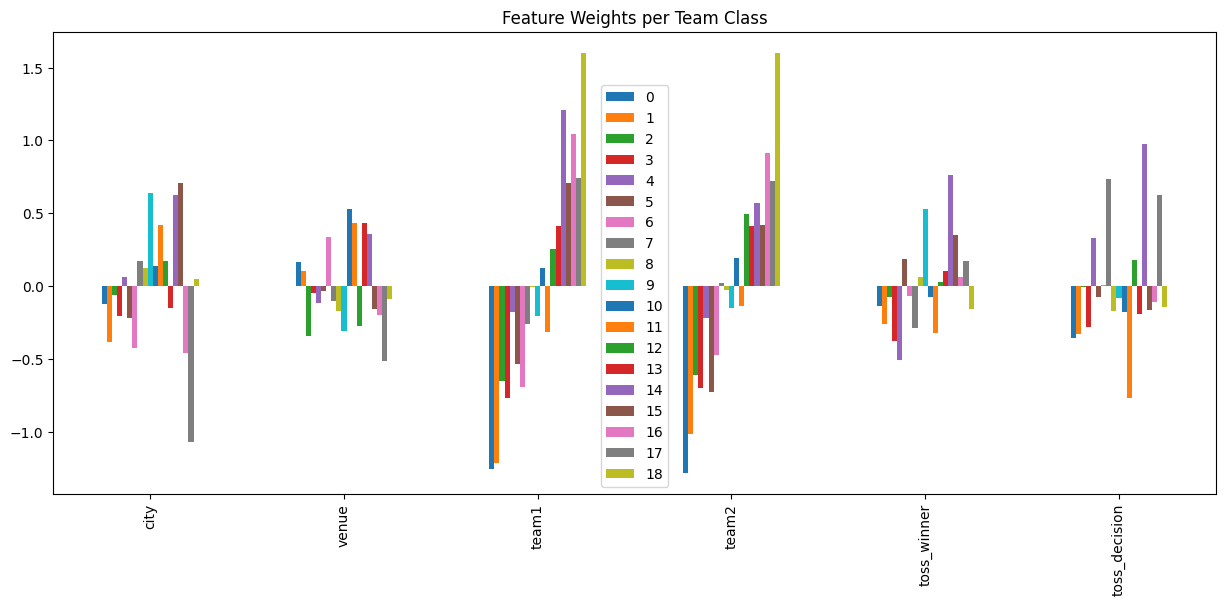

In [141]:
coeffs = pd.DataFrame(logreg.coef_, columns=X.columns)
coeffs.T.plot(kind='bar', figsize=(15,6), title="Feature Weights per Team Class")


In [146]:
print(logreg.intercept_)

[ 1.10198033e+00 -2.98952083e-01  6.56857786e-01  7.99910567e-01
 -1.05399813e+00  2.04868999e-01  1.23847889e+00 -1.71707687e+00
  1.88356613e+00 -2.26587958e-01  2.01565188e+00 -8.40726910e-01
 -3.87922418e-04  1.56209049e+00 -2.48033790e+00 -1.74657390e+00
  1.08121760e+00 -2.54443408e+00  3.64453081e-01]


In [143]:
print(X.columns)

Index(['city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision'], dtype='object')


# Feature Analysis

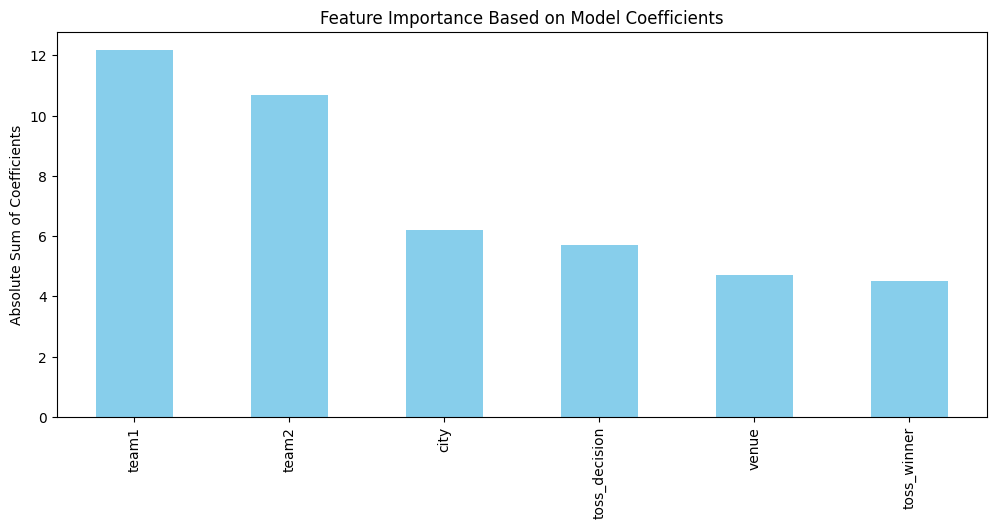

Top 5 Most Influential Features:
 team1            12.169403
team2            10.682301
city              6.207484
toss_decision     5.710953
venue             4.715698
dtype: float64


In [147]:


# Convert model coefficients into a DataFrame
coeffs = pd.DataFrame(logreg.coef_, columns=X.columns)

# Compute absolute sum of weights for each feature
feature_importance = coeffs.abs.sum().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12,5))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance Based on Model Coefficients")
plt.ylabel("Absolute Sum of Coefficients")
plt.show()

# Display the top features
print("Top 5 Most Influential Features:\n", feature_importance.head(5))
